In [148]:
import numpy as np
import pandas as pd

In [149]:
train_df = pd.read_csv("train.csv")

train_df.head()

,ID,url,title,label
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0


In [3]:
test_df = pd.read_csv("test.csv")

test_df.head()

,ID,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67


In [4]:
from sklearn.metrics import f1_score

In [5]:
X_train = train_df["title"].values
X_test = test_df["title"].values
y_train = train_df["label"].values

# Simple baseline

In [6]:
y_pred = [int("порно" in text) for text in X_train]

In [7]:
f1_score(y_train, y_pred)

0.31242758551206484

### Submit

In [8]:
test_df["label"] = [int("порно" in text) for text in X_test]

test_df[["ID", "label"]].to_csv("simple_baseline.csv", index=False)

#!cat simple_baseline.csv | head

### Не все так однозначно

**не порно**:
- Болезни опорно-двигательной системы и импотенция: взаимосвязь
- Транссексуальные рыбы - National Geographic Россия: красота мира в каждом кадре
- Групповая обзорная экскурсия по Афинам - цена €50
- Больного раком Задорнова затравили в соцсетях.
- Гомосексуалисты на «Первом канале»? Эрнст и Галкин – скрытая гей-пара российского шоу-бизнеса | Заметки о стиле, моде и жизни

**порно**:
- Отборная домашка
- Сюзанна - карьера горничной / Susanna cameriera perversa (с русским переводом) 1995 г., DVDRip

# ML baseline

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()

model = MultinomialNB()

In [10]:
X_train

array(['Экс-министр экономики Молдовы - главе МИДЭИ, цель которого сделать из республики не просителя, а донора: Надо избегать долгого нахождения н�',
       'Эта песня стала известна многим телезрителям благодаря сериалу Диверсант-2',
       'Банши 4 сезон 2 серия Бремя красоты смотреть онлайн!', ...,
       '1941 Plymouth Special Deluxe Hot Rod, Automatic,Small Block,Power Steering, A/C for sale: photos, technical specifications, description',
       "Купить It's Skin Сыворотка питательная Power 10 Formula YE Effector, 30 мл в Москве - WOWCREAM",
       'Технический спирт в канистрах и флаконах, купить в Москве'],
      dtype=object)

In [11]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [12]:
X_train_vectorized[0].shape

(1, 189852)

In [13]:
feature_names = np.array(vectorizer.get_feature_names_out())

In [14]:
feature_names

array(['00', '000', '0000', ..., '𝔸𝕟𝕘𝕖𝕝𝕒', '𝔾𝕌𝕊𝕋𝔸𝕍', '𝕆𝕃𝔾𝔸'], dtype=object)

In [15]:
id_ = 42

print(X_train[id_])

x_vector = X_train_vectorized.getrow(id_).toarray()[0]

[feature for feature in feature_names[x_vector > 0]]

Презентация на тему "Приближенное значение. Абсолютная и относительная погрешнос


['абсолютная',
 'значение',
 'на',
 'относительная',
 'погрешнос',
 'презентация',
 'приближенное',
 'тему']

In [16]:
feature_names[41]

'00021'

In [17]:
%%time

model.fit(
    X_train_vectorized,
    y_train
)

y_pred = model.predict(
    X_train_vectorized
)

CPU times: total: 0 ns
Wall time: 25.5 ms


In [18]:
f1_score(y_train, y_pred)

0.9036641864382985

### My ML

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
from wordcloud import WordCloud

from my_librery import *

In [133]:
SEED = 42
TOKEN_PATTERN = "[а-яё]+"
STOP_WORDS = nltk.corpus.stopwords.words('russian') + nltk.corpus.stopwords.words('english')

In [134]:
STOP_WORDS

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

<AxesSubplot: >

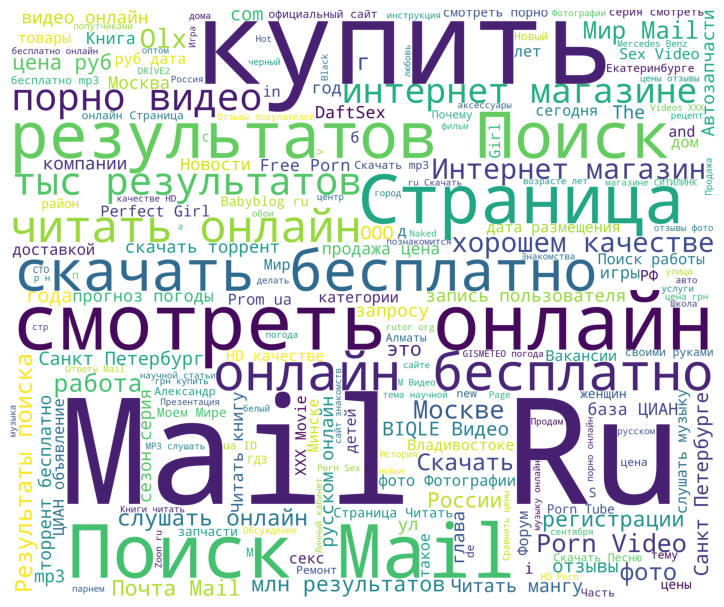

In [25]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                          stopwords=STOP_WORDS,
                          width=3000,
                          height=2500,
                          max_words=200,
                          random_state=42
                          ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(train_df['title'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [85]:
def preprocess_data(dataX, dataY, func_list=None, title_list=None) -> dict:
    X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=SEED)
    dictionary = {'default' : [X_train,Y_train, X_test, Y_test]}
    
    if func_list is not None:
        assert (len(func_list) == len(title_list))
        for i in range(len(func_list)):
            dictionary[title_list[i]] = [func_list[i](X_train), Y_train, func_list[i](X_test), Y_test]
            
    return dictionary

In [86]:
df_train, df_test = train_test_split(train_df, test_size=0.2, random_state=SEED)
X_tr = df_train['title'].values
Y_tr = df_train['label'].values

X_ts = df_test['title'].values
Y_ts = df_test['label'].values

len(X_tr), len(Y_tr), len(X_ts), len(Y_ts),

(108247, 108247, 27062, 27062)

In [87]:
data_inpl = {'default': [X_tr, Y_tr, X_ts, Y_ts]}

def preprocess_data_inplace(func_list=None, title_list=None) -> None:

    if func_list is not None:
        assert (len(func_list) == len(title_list))
        for i in range(len(func_list)):
            data_inpl[title_list[i]] = [func_list[i](X_tr), Y_tr, func_list[i](X_ts), Y_ts]


In [27]:
# nltk.download('universal_tagset')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\zacgr\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zacgr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     C:\Users\zacgr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


True

In [33]:
test = "Эта песня стала известна многим телезрителям благодаря сериалу Диверсант-2 Банши 4 сезон 2 серия Бремя красоты смотреть онлайн! Не Беси Меня Картинки В Новомосковске сыграют следж-хоккеисты алексинской «Звезды» и сборной Китая | Т... Салат: корейская морковь + копченая курица + кукуруза + сухарики, мой: калорийность, белки, жиры, углеводы Угловой пневмогайковерт FUBAG RWC 105 1/2"" 100320 в Екатеринбурге - купить, цены, отзывы, характеристики, фото, инструкция Табачный магазин `Мир Табака` | КУРИТЕЛЬНЫЕ ТРУБКИ | Stanwell | Курительная труб league of legends » Page 5 » Porn comics free online 08:00 (4766р), Одесса - Ростов-на-Дону 20 сентября 2019, Фаворит ЧП ОГЭ, Математика. Функции: Задача №77FB90 | Ответ-Готов мировая экономика в схемах и таблицах - 12 млн результатов. Поиск Mail.Ru кримпай,мать и сын » Страница 5 » смотреть порно мультики, порно комиксы, хентай, онлайн бесплатно Мария Шорох - Без права выбора. Академия (СИ) читать онлайн В Днепре нашли пропавшую 16-летнюю девушку (1) Мой Мир@Mail.Ru Слава Медяник — Стучат колёса Инженерный институт Казанского (Приволжского) федерального университета — Учёба.ру каковы основные черты размещения отраслей топливной промышленности на территорий россии - 2 млн результатов. Поиск Mail.Ru Мужик поставил блондинку раком и отодрал ее тугое очко | порно видео на 24eropixel.net Портер Джейн - Под звездным дождем, скачать бесплатно книгу в формате fb2, doc, rtf, html, txt Порно которое ты искал / Видео - Spaces.ru / Spcs.me Услуга Городской номер - как подключить - Мобильный Билайн - Ульяновск Murodbek Qilichev - Bilmiram » Xorazm.Net погода в сочи в сентябре - 33 тыс. результатов. Поиск Mail.Ru GISMETEO: погода у Гостомелі на 10 днів — прогноз погоди на 10 днів, Ірпінь, Київська область, Україна Службы поддержки Моя учетная запись - Нальчик кожа,волосы,ногти - результаты поиска Форма наряда-допуска на производство работ в местах действия опасных или вредных факторов | СНиП 12-03-2001 Безопасность труда в строительстве Часть первая The Retuses - Ласточка, аккорды, текст, mp3, видео Школьная форма ""Солнце"" Мод-2 черного цвета, цена 79 руб., купить в Гомеле — Deal.by (ID#103835173) Диалог Купить Встраив. газовая панель Hotpoint-Ariston 641 TQG /HA(BK) в каталоге интернет магазина М.Видео по выгодной цене с доставкой, отзывы, фотографии - Вел AUTO3N Форма для леденцов и шоколада КУРОЧКА РЯБА купить Какой будет погода в ноябре - новости Казахстана | Tengrinews Видео DIO- Don't talk to strangers, ♥•*`✿⊱╮IRINA GERN╭⊰✿`*•♥ — Видео@Mail.Ru 5.11 Tactical Job Shirt 1/4 Zip XXL, fire navy | Lamnia OHM CS-18 Отзыв о Домкрат подкатной гидравлический Ombra ОНТ203 | Удобный но тяжелый домкрат. Лесбийский секс с кунилингусом двух стройных студенток: высококачественное порно видео (с участием Эмили Блум) Презентация на тему ""Приближенное значение. Абсолютная и относительная погрешнос Горбачев 29 октября намерен участвовать в заседании по иску Жириновского - Политика - ТАСС Москва - Марокко на 5 ночей - 79 497 руб Гоша Матарадзе - Два Сердца (Dj Movskii & Dj Karasev Remix) - слушать бесплатно онлайн"


In [34]:
clean_text(test)

'эта песня стала известна многим телезрителям благодаря сериалу диверсант2 банши four сезон two серия бремя красоты смотреть онлайн  беси картинки новомосковске сыграют следжхоккеисты алексинской  звезды  сборной китая  т  салат корейская морковь  копченая курица  кукуруза  сухарики  калорийность  белки  жиры  углеводы угловой пневмогайковерт fubag rwc one hundred and five 12 one hundred thousand  three hundred and twenty екатеринбурге  купить  цены  отзывы  характеристики  фото  инструкция табачный магазин  мир табака   курительные трубки  stanwell  курительная труб league of legends  page five  porn comics free online eight hundred  4766р   одесса  ростовнадону twenty сентября 2019  фаворит чп огэ  математика  функции задача 77fb90  ответготов мировая экономика схемах таблицах  twelve млн результатов  поиск mailru кримпай  мать сын  страница five  смотреть порно мультики  порно комиксы  хентай  онлайн бесплатно мария шорох  права выбора  академия  си  читать онлайн днепре нашли пропа

In [40]:
from tqdm import tqdm_notebook
import pymorphy3

lemmatizer_cache = {}
lemmatizer = pymorphy3.MorphAnalyzer()
def lemmatize(token):
    if lemmatizer.word_is_known(token):
        if token not in lemmatizer_cache:
            lemmatizer_cache[token] = lemmatizer.parse(token)[0].normal_form
        return lemmatizer_cache[token]
    return token
def lem_list(X):
    lemmatized_docs = [[lemmatize(token) for token in text] for text in tqdm_notebook(X)]
    cleared_docs = [[token for token in text if token not in STOP_WORDS] for text in lemmatized_docs]
    cleared_docs = [''.join(x) for x in cleared_docs]
    return cleared_docs


In [41]:
def lem_after_clean(X):
    X = clean_data_list(X)
    X = lem_list(X)
    return X

In [137]:
count_model = Pipeline([
    (
        'vectorizer',
        CountVectorizer(
            lowercase=True, ngram_range=(1, 1), token_pattern=TOKEN_PATTERN,
            stop_words=STOP_WORDS, min_df=3, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=SEED, loss='log_loss', class_weight='balanced'))
])

In [139]:
import pickle

with open('data_inpl.pickle', 'wb') as file:
    pickle.dump(data_inpl, file)




In [140]:
with open('data_inpl.pickle', 'rb') as file:
    loaded_dict = pickle.load(file)

In [142]:
loaded_dict.keys()

dict_keys(['default', 'preprocess_news', 'clean_data_list', 'clean_data_list_unicode', 'preprocess_news_after_clear_data'])

In [138]:
fit_predict(count_model, *data_inpl['clean_data_list'])

{'train': 0.6216529199064118, 'test': 0.6054183560633984}

In [102]:
vect_model = Pipeline([
    (
        'vectorizer',
        CountVectorizer(
            lowercase=True, ngram_range=(1, 1), token_pattern=TOKEN_PATTERN,
            stop_words=STOP_WORDS, min_df=3, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(class_weight='balanced'))
])

In [59]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer


def preprocessor(text):
    whitespaced_text = re.sub("[^а-яё!:)(]", ' ', text.lower())
    return re.sub(' +', ' ',  whitespaced_text)


tfdf_model = Pipeline([
    ('vectorizer', TfidfVectorizer(
                    lowercase=True, ngram_range=(2, 4), analyzer='char',
                    preprocessor=preprocessor, min_df=5, max_df=0.8)),
    ('clf', SGDClassifier(class_weight='balanced'))
])

In [114]:
from sklearn.ensemble import RandomForestClassifier

forest_model = Pipeline([
    ('vectorizer', TfidfVectorizer(
        lowercase=True, ngram_range=(2, 4), analyzer='char',
        preprocessor=preprocessor, min_df=5, max_df=0.8)),
    ('clf', RandomForestClassifier())
])

In [126]:
miltinom_model = Pipeline([
    ('vectorizer', TfidfVectorizer(lowercase=True, ngram_range=(0, 3), min_df=5, max_df=0.8, binary=True)),
    ('clf', MultinomialNB())
])

In [147]:
from textblob import TextBlob

# Пример лемматизации
blob = TextBlob("Яблоки были очень вкусные")
lemmatized_words = [word.lemmatize("ru") for word in blob.words]
print(lemmatized_words)

MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
BEST_MODEL = miltinom_model

In [161]:
results = BEST_MODEL.predict(X_test)
test_df["label"] = results

test_df[["ID", "label"]].to_csv("Current_best.csv", index=False)

### Submit

In [24]:
X_test_vectorized = vectorizer.transform(X_test)

test_df["label"] = model.predict(X_test_vectorized)

test_df[["ID", "label"]].to_csv("ml_baseline.csv", index=False)

# !cat ml_baseline.csv | head

In [146]:
import spacy

# Загрузка русской модели spaCy
nlp = spacy.load("ru_core_news_sm")

# Пример лемматизации
doc = nlp("Яблоки были очень вкусные")
for token in doc:
    print(token.text, token.lemma_)

TypeError: issubclass() arg 1 must be a class